In [2]:
# Change here using YOUR own first and last names

fn1 = "Thang"
ln1 = "Bui Doan"
filename = "_".join(map(lambda s: s.strip().lower(),
                        ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
# import os
# old_name = 'Untitled.ipynb'
# os.rename(old_name, filename)

In [3]:
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from scipy.stats import t

# Question 1: Preprocess the data

> (a) Set the random seed to 0.

> (b) Load the data. Print the mean, and standard deviation of every covariate. Is the data centered?
Normalized? Standardized?

> (c) Separate the data in train and test sets: save one fourth of the data as testing (you can use train_test_split from sklearn.model_selection) and standardize both the training and testing sets using the fit_transform and transform functions insklearn.preprocessing.StandardScaler.

> (d) Fit a regular OLS, do we need to fit the intercept?

> (e) Create a dataFrame df_coef and store the R2 coefficients of the estimated model. This dataframe will be used along the TP to store and compare R2 coefficients of other variants of the OLS problemS problem.

In [4]:
np.random.seed(0)

In [5]:
data = pd.read_csv('meatspec.csv')

In [6]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,3.14626,3.15166,3.15703,3.16244,3.16791,3.17348,3.17923,3.18521,3.19140,3.19792,...,3.61483,3.59695,3.57915,3.56142,3.54365,3.52563,3.50705,3.48765,3.46769,31.3
211,2.57992,2.58040,2.58099,2.58175,2.58266,2.58381,2.58530,2.58719,2.58949,2.59225,...,2.95464,2.93756,2.92062,2.90367,2.88668,2.86951,2.85180,2.83347,2.81473,33.8
212,2.56875,2.56923,2.56985,2.57060,2.57150,2.57268,2.57420,2.57610,2.57841,2.58129,...,2.94870,2.93226,2.91592,2.89952,2.88291,2.86595,2.84836,2.82998,2.81111,35.5
213,2.65884,2.65943,2.66023,2.66108,2.66215,2.66360,2.66550,2.66787,2.67070,2.67405,...,3.04851,3.03351,3.01851,3.00327,2.98759,2.97121,2.95374,2.93514,2.91564,42.5


In [7]:
print('Mean: ', np.mean(data, axis=0))
print('Standard deviation: ', np.std(data, axis=0))

Mean:  V1       2.808561
V2       2.811137
V3       2.813727
V4       2.816363
V5       2.819098
          ...    
V97      3.081070
V98      3.062290
V99      3.043548
V100     3.024895
fat     18.142326
Length: 101, dtype: float64
Standard deviation:  V1       0.409837
V2       0.412390
V3       0.414937
V4       0.417491
V5       0.420060
          ...    
V97      0.538474
V98      0.537332
V99      0.535857
V100     0.534108
fat     12.710634
Length: 101, dtype: float64


The data is not centered, normalized or standardized

In [8]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.reshape(-1,1)).squeeze()
y_test = scaler.transform(y_test.reshape(-1,1)).squeeze()

Because both X and y are centered, we do not need to use intercept

In [11]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train, y_train)
df_coef = pd.DataFrame({'Method': [],
                        'R^2 score': []})
df_coef.loc[len(df_coef)] = ['OLS', lr.score(X_test, y_test)]

In [12]:
df_coef

,Method,R^2 score
0,OLS,0.960055


# Question 2: Variable selection

Program the method of the forward variable selection. You can use the test statistics of the test
for nullity (as seen during the course). Do not deﬁne the stop criterion for the method, i.e. add a
variables at each time until all the variables are used. Store the order of the variable selection and
the associated p-value for each of them.

In [12]:
X_train.shape

(161, 100)

In [13]:
y_train.shape

(161,)

In [14]:
def forward_variable_selection(X, y):
    n, p = X.shape
    remaining_list = np.arange(p).tolist()
    choosen_list = []
    p_list = []
    residual = y

    for i in range(p):
        t_list = []
        for variable in remaining_list:
            x = X[:, variable].reshape(-1,1)
            coef = LinearRegression(fit_intercept=False).fit(x, residual).coef_
            # one_x = np.concatenate((np.ones((n,1)), x.reshape(-1,1)), axis=1)
            # one_x = np.stack((np.ones(n), x), axis=1)
            one_x = np.concatenate((np.ones((n, 1)), x), axis = 1)
            G = 1/n*one_x.T@one_x
            s = np.sqrt(np.linalg.inv(G)[1,1])

            sigma = 1/(n-2) * np.sum((residual - x@coef.T)**2)
            
            t_value = np.linalg.norm(coef)*np.sqrt(n)/(s*sigma)
            t_list.append(t_value)

        max_index = np.argmax(t_list)
        x = X[:, remaining_list[max_index]].reshape(-1,1)
        coef = LinearRegression(fit_intercept=False).fit(x, residual).coef_
        residual = residual - x@coef.T
        choosen_list.append(remaining_list[max_index])
        remaining_list.pop(max_index)
        p_value = 2 * (1 - t.cdf(np.max(t_list), n-2))
        p_list.append(p_value)

    return choosen_list, p_list

choosen_variable, p_list = forward_variable_selection(X_train, y_train)

# Question 3: Run OLS on the variables with p-value smaller than 0.05

In [15]:
# The number of selected variables
count = np.sum([p< 0.05 for p in p_list])
selected = choosen_variable[:count]

In [16]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train[:, selected], y_train)
df_coef.loc[len(df_coef)] = ['Variable selection', lr.score(X_test[:, selected], y_test)]

In [17]:
df_coef

,Method,R^2 score
0,OLS,0.960055
1,Variable selection,0.955180


# Question 4: 
Using SequentialFeatureSelector on a linear regression estimator select (with forward selection), select the same number of variables as in the previous question.
> Elaborate on why the 2 algorithms do not return the same variables and store the R2 onto the corresponding dataFrame.

In [18]:
count

23

In [20]:
from sklearn.feature_selection import SequentialFeatureSelector

lr = LinearRegression(fit_intercept=False)
sfs = SequentialFeatureSelector(estimator = lr, n_features_to_select = count)
sfs.fit(X_train, y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

lr.fit(X_train_sfs, y_train)
df_coef.loc[len(df_coef)] = ['Sequential Feature Selector', lr.score(X_test_sfs, y_test)]

In [21]:
df_coef

,Method,R^2 score
0,OLS,0.960055
1,Variable selection,0.955180
2,Sequential Feature Selector,0.938730


The Sequential Feature Selector choose the variables based on cross-validation score. Meanwhile, variable forward selection choose variable based on the p-value. Thus the features chose by the 2 methods are not the same.

# Question 5: Ridge

Code your own ridge estimator using expression derived in class. Test it for a penalty parameter α 
spaced evenly on a log scale 10e-9 to 10e2 \

> (a) Plot how the values of the coefficients change with α.

>(b) Plot how MSE of both the train and test sets change with α. Signal the minimum with a point.

>(c) For the best performing value of α (the one with smallest training error) store the R2 resultsults.

$\theta = (X^TX + n\lambda I) ^{-1} X^Ty$

In [22]:
n, p = X_train.shape

In [23]:
log_lambda_list = np.arange(-9, 3, 1).astype(float)
lambda_list = 10**log_lambda_list

In [24]:
theta_list = []
mse_train = []
mse_test = []
for lbda in lambda_list:
    theta = np.linalg.inv(X_train.T@X_train + n*lbda*np.eye(p))@(X_train.T@y_train)
    theta_list.append(theta)
    mse_train.append(np.average((y_train - X_train@theta.T)**2))
    mse_test.append(np.average((y_test - X_test@theta.T)**2))

In [25]:
norm_theta = np.linalg.norm(theta_list, axis = 1)

Text(0.5, 1.0, 'Change of coefficients according to lambda')

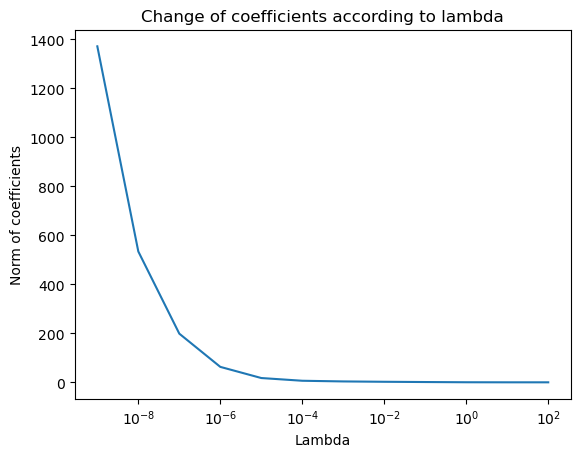

In [26]:
import matplotlib.pyplot as plt

plt.plot(lambda_list, norm_theta)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Norm of coefficients')
plt.title('Change of coefficients according to lambda')

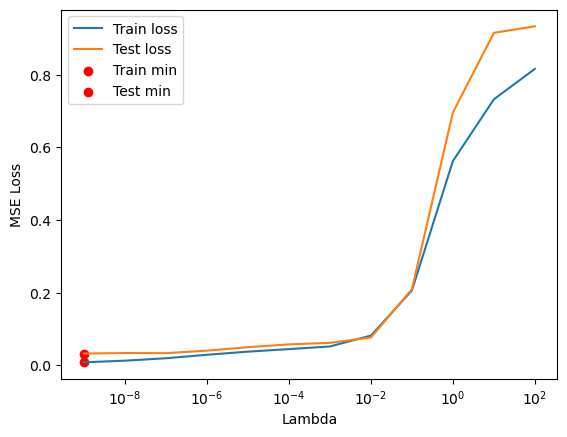

In [28]:
plt.plot(lambda_list, mse_train, label = 'Train loss')
plt.plot(lambda_list, mse_test, label = 'Test loss')
plt.scatter(lambda_list[np.argmin(mse_train)], np.min(mse_train), color='red', label='Train min')
plt.scatter(lambda_list[np.argmin(mse_test)], np.min(mse_test), color='red', label='Test min')

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE Loss')
plt.legend()

$10^{-9}$ is the best Ridge coefficient

In [30]:
theta = np.linalg.inv(X_train.T@X_train + n*10**-9*np.eye(p))@(X_train.T@y_train)
y_pred = X_test@theta.T
R_res = np.sum((y_test-y_pred)**2)
R_total = np.sum((y_test - np.mean(y_test))**2)
R2 = 1 - R_res/R_total
df_coef.loc[len(df_coef)] = ['Ridge', R2]

In [31]:
df_coef

,Method,R^2 score
0,OLS,0.960055
1,Variable selection,0.955180
2,Sequential Feature Selector,0.938730
3,Ridge,0.968269


# Question 6: Lasso

In [32]:
from sklearn.linear_model import Lasso

lambda_list = np.logspace(-5, -2)
diff_zero_list = []
mse_train_list = []
mse_test_list = []
for lbda in lambda_list:
    model = Lasso(alpha=lbda, fit_intercept=False, max_iter = 50000, tol=0.03)
    model.fit(X_train, y_train)
    theta = model.coef_
    diff_zero_count = np.sum(theta!=0)
    diff_zero_list.append(diff_zero_count)
    mse_train = np.average((y_train - X_train@theta.T)**2)
    mse_test = np.average((y_test - X_test@theta.T)**2)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)


Text(0, 0.5, 'Number of different from 0 coeffiecients')

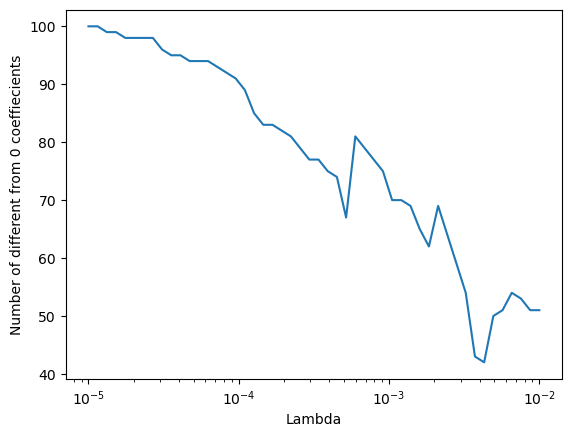

In [33]:
plt.plot(lambda_list, diff_zero_list)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Number of different from 0 coeffiecients')

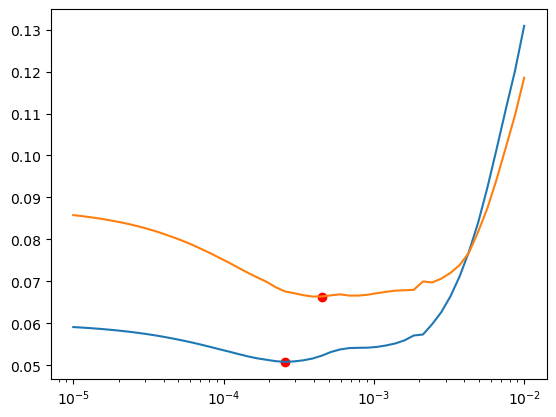

In [34]:
plt.plot(lambda_list, mse_train_list, label='Train loss')
plt.plot(lambda_list, mse_test_list, label='Test loss')
plt.xscale('log')
plt.scatter(lambda_list[np.argmin(mse_train_list)], np.min(mse_train_list), color='red', label='Train min')
plt.scatter(lambda_list[np.argmin(mse_test_list)], np.min(mse_test_list), color='red', label='Test min')

In [35]:
lbda = lambda_list[np.argmin(mse_train_list)]

In [36]:
model = Lasso(alpha=lbda, max_iter=50000, tol=0.03)
model.fit(X_train, y_train)
df_coef.loc[len(df_coef)] = ['Lasso', model.score(X_test, y_test)]

In [37]:
df_coef

,Method,R^2 score
0,OLS,0.960055
1,Variable selection,0.955180
2,Sequential Feature Selector,0.938730
3,Ridge,0.968269
4,Lasso,0.932695


# Question 7: Cross-validation

In [38]:
from sklearn.linear_model import ElasticNet

def cv(k = 5, X=X_train, y=y_train):
    n = X.shape[0]
    number_list = np.random.permutation(n)
    flag = np.arange(n)
    flag %=k

    ridge_list = np.logspace(-10, 3)
    lasso_list = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99]

    mse = np.zeros((k, len(ridge_list), len(lasso_list)))
    
    for i in range(k):
        X_train = X[number_list[flag!=i]]
        y_train = y[number_list[flag!=i]]
        X_val = X[number_list[flag==i]]
        y_val = y[number_list[flag==i]]

        for j in range(len(ridge_list)):
            for k in range(len(lasso_list)):
                alpha = ridge_list[j] + lasso_list[k]
                l1_ratio = lasso_list[k]/alpha
                model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=False, max_iter=200000, tol=0.05)
                model.fit(X_train, y_train)
                y_predict = model.predict(X_val)
                mse[i, j, k] = np.average((y_val - y_predict)**2)

    mse_av = np.average(mse, axis=0)
    index = np.argmin(mse_av)

    return ridge_list[int(index/len(lasso_list))], lasso_list[index%len(lasso_list)]

alpha_ridge, alpha_lasso = cv(k=5, X=X_train, y=y_train)      

C:\Users\thang\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.111e+00, tolerance: 5.998e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\thang\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.236e+00, tolerance: 5.998e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

In [39]:
alpha_ridge, alpha_lasso

(0.0014563484775012444, 0)

# Question 8: Bootstrap

In [19]:
import matplotlib.pyplot as plt

In [13]:
x_min = np.min(X.iloc[:, 40])
x_max = np.max(X.iloc[:, 40])

In [14]:
choice = np.random.choice(len(X), len(X), replace=True)
x_bt = X.iloc[choice, 40]
y_bt = y[choice]

In [15]:
coef_m = np.zeros(50)
intercept_m = np.zeros(50)
for i in range(50):
    choice = np.random.choice(len(X), len(X), replace=True)
    x_bt = X.iloc[choice, 40].to_numpy().reshape(-1,1)
    y_bt = y[choice]
    lr = LinearRegression()
    lr.fit(x_bt, y_bt)
    coef_m[i] = lr.coef_
    intercept_m[i] = lr.intercept_

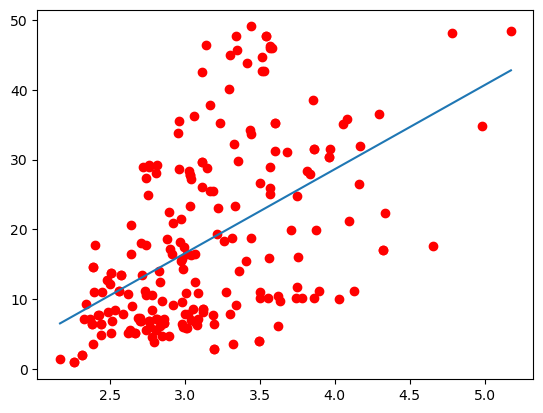

In [20]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X.iloc[:, 40].to_numpy().reshape(-1,1), y)
coef = lr.coef_
intercept = lr.intercept_
plt.scatter(X.iloc[:, 40], y, color='red')
plt.plot([x_min, x_max], [intercept + x_min*coef, intercept + x_max*coef])

In [21]:
n, p = X.shape

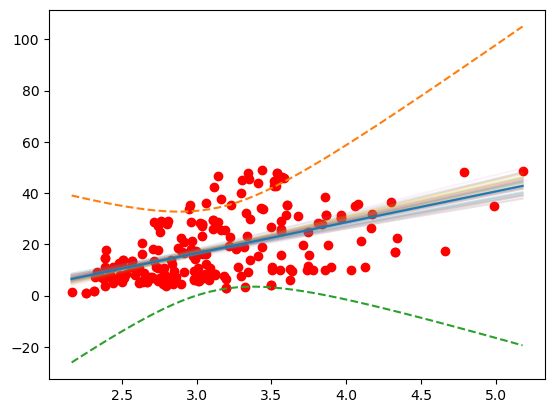

In [23]:
for i in range(50):
    plt.plot([x_min, x_max], [intercept_m[i] + x_min*coef_m[i], intercept_m[i] + x_max*coef_m[i]], alpha=0.1)

plt.plot([x_min, x_max], [intercept + x_min*coef, intercept + x_max*coef])

x_list = np.linspace(x_min, x_max)
y_list = intercept + x_list * coef


from scipy.stats import t
s2 = np.sum((y - intercept - X.iloc[:, 40]*coef)**2) / (len(X) -2)
x_40_mean = X.iloc[:,40].mean()
var_conf = s2 * (1/n + (x_list - x_40_mean)**2/np.sum((X.iloc[:, 40] - x_40_mean)**2))
alpha = 0.05
upper_interval = y_list + t.ppf(1 - alpha/2, n-2)*np.sqrt(s2*var_conf)
lower_interval = y_list - t.ppf(1 - alpha/2, n-2)*np.sqrt(s2*var_conf)
plt.scatter(X.iloc[:, 40], y, color='red')

plt.plot(x_list, upper_interval, '--')
plt.plot(x_list, lower_interval, '--')


# Question 9: PCA

In [24]:
cov_X = X_train.T@X_train/(n-1)

In [25]:
cov_X

array([[0.75233645, 0.75233005, 0.75231191, ..., 0.72744169, 0.72724732,
        0.72709997],
       [0.75233005, 0.75233645, 0.75233056, ..., 0.72761524, 0.72743023,
        0.72729263],
       [0.75231191, 0.75233056, 0.75233645, ..., 0.72777468, 0.72759857,
        0.72747022],
       ...,
       [0.72744169, 0.72761524, 0.72777468, ..., 0.75233645, 0.75232822,
        0.75230283],
       [0.72724732, 0.72743023, 0.72759857, ..., 0.75232822, 0.75233645,
        0.75232775],
       [0.72709997, 0.72729263, 0.72747022, ..., 0.75230283, 0.75232775,
        0.75233645]])

<Axes: >

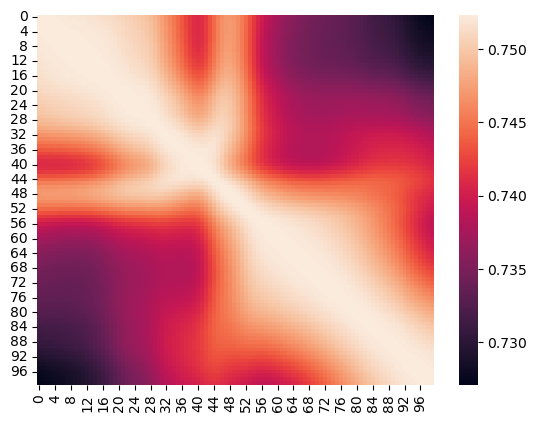

In [26]:
import seaborn as sns
sns.heatmap(cov_X)

In [60]:
U, s, Vt = np.linalg.svd(cov_X)

In [28]:
s

array([7.43753268e+01, 6.02426537e-01, 1.74422411e-01, 7.37385058e-02,
       4.89128002e-03, 1.98461077e-03, 4.98452051e-04, 2.43611089e-04,
       5.21012896e-05, 3.56146821e-05, 1.18413477e-05, 6.59296605e-06,
       2.33981380e-06, 1.34975119e-06, 6.82830186e-07, 4.60684540e-07,
       3.62417857e-07, 3.39709898e-07, 2.25716931e-07, 1.81110758e-07,
       1.09646184e-07, 8.70126519e-08, 5.91302984e-08, 4.87002252e-08,
       3.91436915e-08, 3.51311544e-08, 2.68900128e-08, 2.59667168e-08,
       1.78287511e-08, 1.60822165e-08, 1.49304113e-08, 1.28144487e-08,
       1.20984417e-08, 1.12725805e-08, 1.03290211e-08, 7.92168808e-09,
       6.89634599e-09, 6.41046478e-09, 5.56364303e-09, 4.32070113e-09,
       4.03407303e-09, 3.48314942e-09, 3.44174189e-09, 2.96430845e-09,
       2.51252977e-09, 2.08088095e-09, 2.04715242e-09, 1.79047539e-09,
       1.54929412e-09, 1.47612588e-09, 1.27967064e-09, 1.15344964e-09,
       1.00637467e-09, 9.23636135e-10, 8.66498664e-10, 7.65194816e-10,
      

In [57]:
variance_explained = []
for i in range(p):
    variance_explained.append(np.sum(s[:i+1])/np.sum(s))

In [58]:
U[0,:10]

array([-0.09968114, -0.13432408, -0.08484062, -0.0884697 , -0.33850566,
       -0.15952178,  0.08021554,  0.01136261,  0.08071067,  0.15241397])

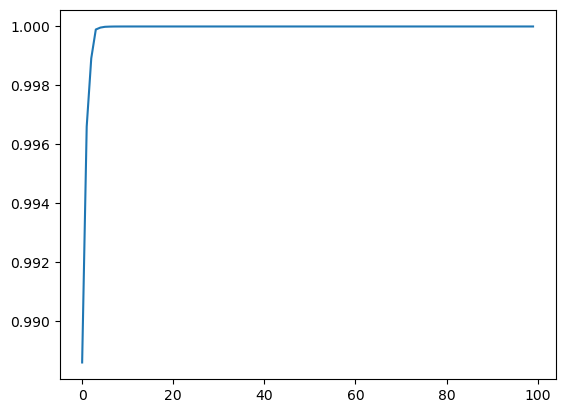

In [59]:
plt.plot(variance_explained)

In [ ]:
PC1 = X @ V[:, 0]
PC2 = X @ U[:, 1]

